In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [2]:
PATH="../Dati/InterCalibrazione - Foglio1.csv"  #importo il file con la calibrazione
data=pd.read_csv(PATH, sep=',', decimal=',')
display(data)
#Ch=np.array(data["12 aprile"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err_stat"])      #errori stocastici sulla posizione dei picchi
peak_err_sist=np.array(data["err_sist [pC]"])
peak_err=np.sqrt(peak_err_stat**2 + (0.34*peak_err_sist)**2)


,12 aprile,val,err_stat,err_sist [pC]
0,0,-309.82201,0.077,1.20
1,1,NaN,NaN,NaN
2,2,-330.64100,0.088,1.60
3,3,-319.28000,0.140,1.90
4,4,-295.11100,0.070,0.60
5,5,-295.76800,NaN,1.10
6,6,-284.11000,0.100,1.90
7,7,-339.05600,0.062,1.20
8,8,-311.56600,0.075,1.30
9,9,-286.21000,0.220,7.00


In [3]:
channel_ref=7

In [4]:
coeff_cal=peak_centers/peak_centers[channel_ref]
coeff_err=peak_err/peak_centers[channel_ref]
coeff_err[channel_ref]=0
print(coeff_cal)
print(coeff_err)

[0.91377828        nan 0.97518109 0.94167335 0.87039014 0.87232788
 0.83794417 1.         0.91892195 0.84413784 1.12061134 0.86097872
        nan        nan 0.93574513 0.93005285]
[-0.00122458         nan -0.00162531 -0.00194952 -0.00063611         nan
 -0.00192798  0.         -0.00132225 -0.00704941 -0.00406809 -0.00045844
         nan         nan -0.00044299 -0.00071543]


In [5]:
list=[0,1,2,3,4,5,6,7,8,9,10,11,14,15]
train_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(train_peak_centers)
train_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(train_peak_centers)
print(train_peak_errors)


[-339.056      nan -339.056 -339.056 -339.056 -339.056 -339.056 -339.056
 -339.056 -339.056 -339.056 -339.056 -339.056 -339.056]
[-339.056      nan -339.056 -339.056 -339.056 -339.056 -339.056 -339.056
 -339.056 -339.056 -339.056 -339.056 -339.056 -339.056]
[0.64259002        nan 0.79916751 0.9926901  0.35043076        nan
 1.1032514  0.4126839  0.68995778 4.00429568 1.74069353 0.25531718
 0.22699736 0.36884796]


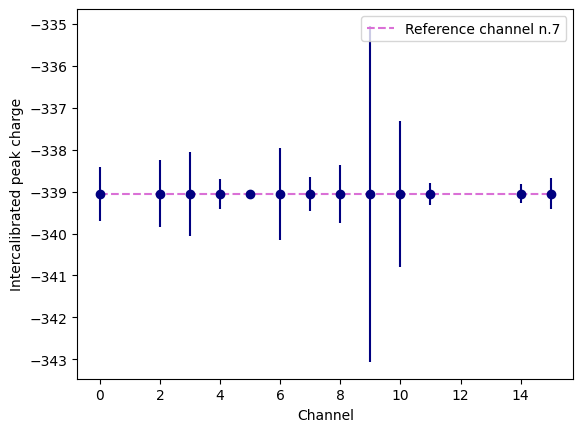

In [6]:
#plot
plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()

##  Test

In [7]:
PATH="../Dati/InterCalibrazione - Test.csv"  #importo il file con i nuovi picchi da verificare
data=pd.read_csv(PATH, sep=',', decimal=',')
display(data)
#Ch=np.array(data["ch"])       #indice del canale 
peak_centers=np.array(data["val"])     #posizioni dei picchi
peak_err_stat=np.array(data["err_stat"])      #errori stocastici sulla posizione dei picchi

peak_err_sist=np.array(data["err_sist"])
peak_err=np.sqrt(peak_err_stat**2 + peak_err_sist**2)


###########################################################################
test_peak_centers=np.array([peak_centers[i]/coeff_cal[i] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([np.sqrt((peak_err[i]/coeff_cal[i])**2 + (coeff_err[i]*peak_centers[i]/coeff_cal[i]**2)**2) for i in list])

print(test_peak_errors)


,ch,val,err_stat,err_sist
0,0,-310.39,0.12,1.00
1,1,NaN,NaN,NaN
2,2,-337.12,0.17,2.00
3,3,-320.46,0.20,3.00
4,4,NaN,NaN,NaN
5,5,-297.34,0.13,1.00
6,6,-278.20,0.20,3.00
7,7,-343.15,0.12,2.00
8,8,-317.29,0.12,1.00
9,9,-262.04,0.83,10.00


[-339.67758404           nan -345.69989421 -340.30908845           nan
 -340.85807471 -332.00302418 -343.15       -345.28503829 -310.42323553
 -337.02139629           nan -346.02370927 -339.31404985]
[ 1.19251097         nan  2.13741832  3.26969586         nan         nan
  3.66855009  2.00359677  1.20339035 12.1665286   3.77798701         nan
  0.54783765  1.62617146]


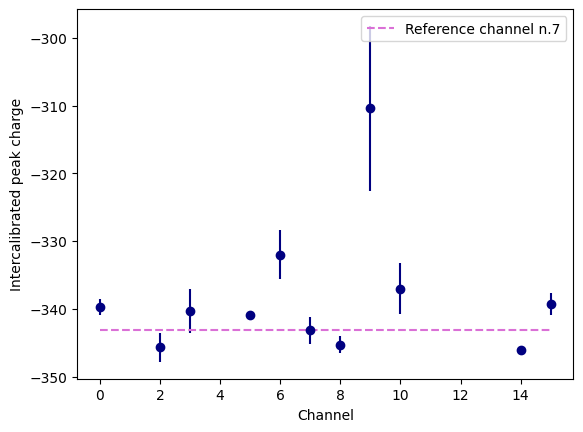

In [8]:
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='navy')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='orchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    